In [1]:
#transformation

import pandas as pd
df1=pd.read_csv("d:/csv-ml/boston_dataset.csv")

In [2]:
df1.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df1=df1.drop("Unnamed: 0",axis=1)

In [4]:
x=df1.iloc[:,0:13]
y=df1.iloc[:,13]

# Primer model or full model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [6]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=100)

In [7]:
lm_model=LinearRegression().fit(x_tr,y_tr)

In [8]:
y_fitted=lm_model.predict(x_tr)

In [9]:
import numpy as np
resid=np.array(y_fitted)-np.array(y_tr)


In [10]:
r2_score(y_tr,y_fitted)

0.7337332767917557

In [11]:
p=lm_model.predict(x_test)

In [12]:
#validation tests of linear regression

In [13]:
#Linearity

<AxesSubplot:>

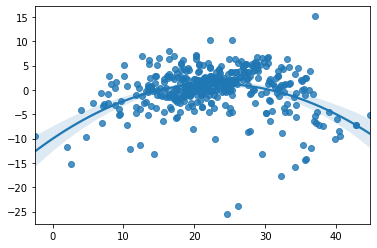

In [14]:
#residual plot
import seaborn as sns
sns.regplot(x=y_fitted,y=resid,order=2)



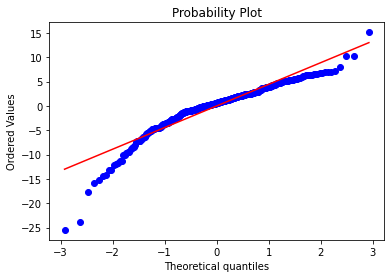

In [15]:
#qqplot
from scipy import stats
import pylab
stats.probplot(resid,dist="norm",plot=pylab)
pylab.show()

In [16]:
#shapiro wilk test
from scipy import stats
stats.shapiro(resid)

ShapiroResult(statistic=0.9052581191062927, pvalue=3.4911509006775848e-15)

In [17]:
#pvalue less than .05 ,residuals not normally distributed

C:\Users\Indrani Sen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

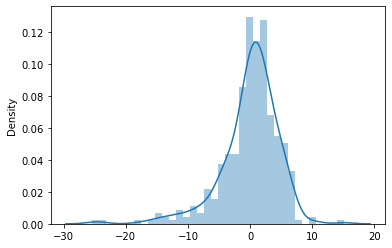

In [18]:
#distplot
sns.distplot(resid)

In [19]:
from scipy.stats import skew
skew(resid)

-1.451583282767006

In [20]:
from scipy.stats import kurtosis
kurtosis(resid)

4.721692034819949

C:\Users\Indrani Sen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

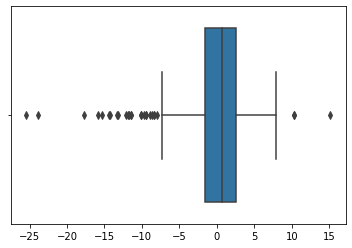

In [21]:
sns.boxplot(resid)

In [22]:
#durbin watson test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
durbin_watson(resid)

2.029021412907427

In [23]:
#no autocorrelation

In [24]:
#bptest for heterskedascity
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(resid,x_tr)

(94.52162545398028,
 6.54068113080439e-15,
 9.18616579286174,
 1.3284427708707769e-16)

In [25]:
#p-value less than .05 heroskedascity oresent

In [26]:
# log transformation of dependant variable

In [27]:
y_log=np.log(y)
x_tr,x_test,y_tr,y_test=train_test_split(x,y_log,test_size=.2,random_state=100)

In [28]:
model_log_lm=LinearRegression().fit(x_tr,y_tr)
log_fitted=model_log_lm.predict(x_tr)
p_log=model_log_lm.predict(x_test)
p_actual=np.exp(p_log)
r2_score(y_tr,log_fitted)

0.7875326530065212

In [29]:
resid_log=np.array(log_fitted)-np.array(y_tr)

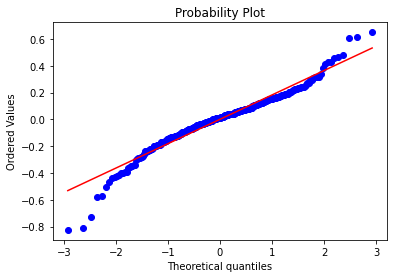

In [30]:
stats.probplot(resid_log,dist="norm",plot=pylab)
pylab.show()

In [31]:
skew(resid_log)

-0.551501599775041

In [32]:
stats.shapiro(resid_log)

ShapiroResult(statistic=0.9531532526016235, pvalue=5.036966399529774e-10)

In [33]:
stats.shapiro(resid_log)

ShapiroResult(statistic=0.9531532526016235, pvalue=5.036966399529774e-10)

In [34]:
from statsmodels.stats.diagnostic import het_breuschpagan
het_breuschpagan(resid_log,x_tr)

(115.91629988907708,
 4.017212248988146e-19,
 12.102057956708146,
 3.298483996045729e-22)

In [35]:
#heteroskedasity present

# log10 transformation

In [36]:
y_log10=np.log10(y)
x_tr,x_test,y_tr,y_test=train_test_split(x,y_log10,test_size=.2,random_state=100)
model_log_lm=LinearRegression().fit(x_tr,y_tr)
log10_fitted=model_log_lm.predict(x_tr)
r2_score(y_tr,log10_fitted)


0.7875326530065212

In [37]:
p_log10=model_log_lm.predict(x_test)
r2_score(y_test,p_log10)

0.7840794771166174

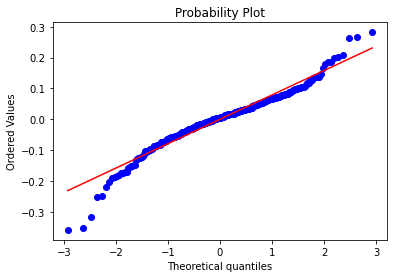

In [38]:
resid_log10=np.array(log10_fitted)-np.array(y_tr)
stats.probplot(resid_log10,dist="norm",plot=pylab)
pylab.show()

<AxesSubplot:>

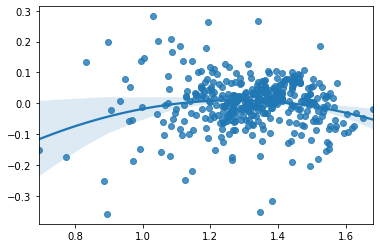

In [39]:
sns.regplot(x=log10_fitted,y=resid_log10,order=2)

In [40]:
stats.shapiro(resid_log10)

ShapiroResult(statistic=0.953153669834137, pvalue=5.037568140409121e-10)

# log transformation of independant as well as dependant variable



In [41]:
# Box cox transformation

In [42]:
from scipy.special import boxcox1p
from scipy.special import boxcox
from scipy.special import inv_boxcox
df_trans=df1.apply(lambda x: boxcox1p(x,0.0))

In [43]:
df_trans.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.006300,2.944439,1.196948,0.0,0.430483,2.024853,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421,3.218876
1,0.026944,0.000000,2.088153,0.0,0.384582,2.004314,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488,3.117950
2,0.026924,0.000000,2.088153,0.0,0.384582,2.102303,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420,3.575151
3,0.031857,0.000000,1.156881,0.0,0.377066,2.079192,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181,3.538057
4,0.066770,0.000000,1.156881,0.0,0.377066,2.097650,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300,3.616309


In [44]:
x=df_trans.iloc[:,0:13]
y=df_trans.iloc[:,13]

In [45]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=100)
model_log_lm=LinearRegression().fit(x_tr,y_tr)
log_fitted_full=model_log_lm.predict(x_tr)
r2_score(y_tr,log_fitted_full)

0.796166619775725

In [46]:
resid=np.array(log_fitted_full)-np.array(y_tr)

In [47]:
p=model_log_lm.predict(x_test)

In [48]:
r2_score(y_test,p)

0.7979312627950956

In [49]:
stats.shapiro(resid)


ShapiroResult(statistic=0.9611989259719849, pvalue=7.583791372667292e-09)

C:\Users\Indrani Sen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

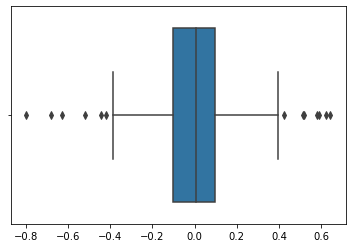

In [50]:
sns.boxplot(resid)

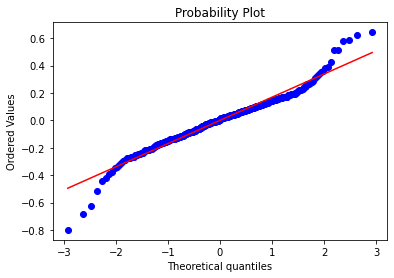

In [51]:
stats.probplot(resid,dist="norm",plot=pylab)
pylab.show()

<AxesSubplot:>

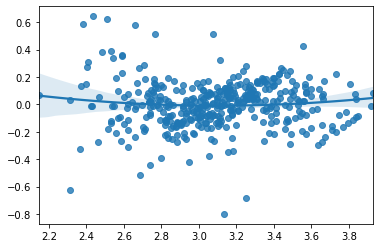

In [52]:
sns.regplot(x=log_fitted_full,y=resid,order=2)

In [53]:
y_actual=inv_boxcox(y_test,0.0)

In [54]:
p_actual=inv_boxcox(p,0.0)

In [55]:
r2_score(y_actual,p_actual)

0.7835889802690214

# squareroot transformation

In [56]:
from scipy.special import boxcox1p
from scipy.special import boxcox
from scipy.special import inv_boxcox
df_sq=df1.apply(lambda x: boxcox1p(x,0.5))

In [57]:
x=df_sq.iloc[:,0:13]
y=df_sq.iloc[:,13]

In [58]:
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=.2,random_state=100)
model_log_lm=LinearRegression().fit(x_tr,y_tr)
sq_fitted=model_log_lm.predict(x_tr)
r2_score(y_tr,sq_fitted)

0.7931055959153699

In [59]:
resid=np.array(sq_fitted)-np.array(y_tr)

In [60]:
skew(resid)

-0.9222432517134387

In [61]:
kurtosis(resid)

3.0559483922838906

<AxesSubplot:>

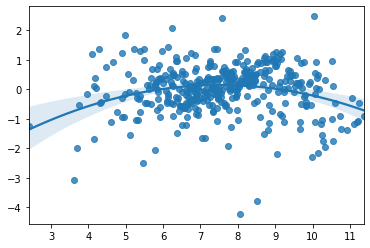

In [62]:
sns.regplot(x=sq_fitted,y=resid,order=2)

# scale transformation

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
#x_scaled=(x-mean)/sd

In [65]:
x=df1.iloc[:,0:13]
y=df1.iloc[:,[13]]

In [66]:
x_scaled=StandardScaler().fit_transform(x)

In [67]:
y_scaled=StandardScaler().fit_transform(y)

In [68]:
x_tr,x_test,y_tr,y_test=train_test_split(x_scaled,y_scaled,test_size=.2,random_state=100)
model_scaled_lm=LinearRegression().fit(x_tr,y_tr)
fitted=model_scaled_lm.predict(x_tr)
r2_score(y_tr,fitted)

0.7337332767917557

In [69]:
resid=np.array(fitted)-np.array(y_tr)

In [70]:
skew(resid)

array([-1.45158328])

In [71]:
p=model_scaled_lm.predict(x_test)


In [72]:
r2_score(y_test,p)

0.7555033086871293

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
#x_min_scaled=x-min(x)/max(x)-min(x)

In [75]:
x_array=np.array(x)
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [76]:
x_array

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [77]:
x_new=MinMaxScaler().fit_transform(x_array)

In [78]:
x_new

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])